# Week 2

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. You can also go "the old way" and use _stackoverflow_. And by the way, never search stack overflow: search Google and choose the relevant stackoverflow topic.

Now, to the exercise:


> *Exercise*: 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. <font color='grey'>You should be able to do this without any help from LLMs.</font> Print it to three decimal places.
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data (tsv)
data1 = pd.read_csv("../files/data1.tsv", sep="\t")
data2 = pd.read_csv("../files/data2.tsv", sep="\t")
data3 = pd.read_csv("../files/data3.tsv", sep="\t")
data4 = pd.read_csv("../files/data4.tsv", sep="\t")
data = [data1, data2, data3, data4]

#MEANS

#For each data do mean1 = data.iloc[:,0].mean()
i = 0
for d in data:
    i += 1
    meanX = d.iloc[:,0].mean()
    meanY = d.iloc[:,1].mean()
    #Format to 2 decimal places using :.2f
    print("Mean [x,y] for ",i,": [", "{:.2f}".format(meanX),",","{:.2f}".format(meanY),"]")


Mean [x,y] for  1 : [ 8.90 , 7.45 ]
Mean [x,y] for  2 : [ 8.90 , 7.34 ]
Mean [x,y] for  3 : [ 8.90 , 7.50 ]
Mean [x,y] for  4 : [ 9.10 , 7.59 ]


In [48]:
#Variance
i = 10
for d in data:
    i += 1
    varX = d.iloc[:,0].var()
    varY = d.iloc[:,1].var()
    #Format to 3 decimal places using :.3f
    print("Variance [x,y] for ",i,": [", "{:.3f}".format(varX),",","{:.3f}".format(varY),"]")
    
#or do it for each pair of x,y value
i = 0
for d in data:
    i += 1
    for j in range(len(d)):
        varX = d.iloc[j,0]
        varY = d.iloc[j,1]
        print("Variance for d",i,"pair",j,"{:.3f}".format(varX),",","{:.3f}".format(varY),"]")

Variance [x,y] for  11 : [ 12.100 , 4.550 ]
Variance [x,y] for  12 : [ 12.100 , 4.258 ]
Variance [x,y] for  13 : [ 12.100 , 4.580 ]
Variance [x,y] for  14 : [ 12.100 , 4.478 ]
Variance for d 1 pair 0 8.000 , 6.950 ]
Variance for d 1 pair 1 13.000 , 7.580 ]
Variance for d 1 pair 2 9.000 , 8.810 ]
Variance for d 1 pair 3 11.000 , 8.330 ]
Variance for d 1 pair 4 14.000 , 9.960 ]
Variance for d 1 pair 5 6.000 , 7.240 ]
Variance for d 1 pair 6 4.000 , 4.260 ]
Variance for d 1 pair 7 12.000 , 10.840 ]
Variance for d 1 pair 8 7.000 , 4.820 ]
Variance for d 1 pair 9 5.000 , 5.680 ]
Variance for d 2 pair 0 8.000 , 8.140 ]
Variance for d 2 pair 1 13.000 , 8.740 ]
Variance for d 2 pair 2 9.000 , 8.770 ]
Variance for d 2 pair 3 11.000 , 9.260 ]
Variance for d 2 pair 4 14.000 , 8.100 ]
Variance for d 2 pair 5 6.000 , 6.130 ]
Variance for d 2 pair 6 4.000 , 3.100 ]
Variance for d 2 pair 7 12.000 , 9.130 ]
Variance for d 2 pair 8 7.000 , 7.260 ]
Variance for d 2 pair 9 5.000 , 4.740 ]
Variance for d 

In [49]:
#Pearson correlation
i = 0
for d in data:
    i += 1
    PCor = d.iloc[:,0].corr(d.iloc[:,1],"pearson")
    print("Pearson correlation [x,y] for ",i,"{:.2f}".format(PCor))

Pearson correlation [x,y] for  1 0.81
Pearson correlation [x,y] for  2 0.82
Pearson correlation [x,y] for  3 0.82
Pearson correlation [x,y] for  4 0.81


> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`.
> ```
> from scipy import stats
> a, b, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Comment on the results from the previous steps. What do you observe? 
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/anscombe.png).) <font color='grey'>For this sub-exercise, try to write the code based on the example I link to. If you get stuck, you may use your LLM to figure it out. But don't ask it for the solution, ask for help with figuring out how to use the functions!</font>
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this). <font color='grey'>Again, try to write down your own thoughts first. Then you can ask your LLM for help after that</font>.
> * <font color='grey'>What did you get out of asking the LLM about the previous sub-question? How did you even go about asking the LLM about the point of the entire set of questions? Reflect on whether or not the LLM helped you get smarter?</font>


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!!

Linear regression for data 1 : y = 0.49969696969696975 x + 2.999696969696969
R-squared: 0.6639807428074275
p-value: 0.00408478689421084
Standard error: 0.12567996875180446
Linear regression for data 2 : y = 0.488494031221304 x + 2.989403122130395
R-squared: 0.6781245321790763
p-value: 0.003412211976727495
Standard error: 0.11898808606240259
Linear regression for data 3 : y = 0.5051790633608816 x + 3.007906336088154
R-squared: 0.6741612740339356
p-value: 0.003591285779112509
Standard error: 0.12417089130805758
Linear regression for data 4 : y = 0.49565656565656574 x + 3.082525252525251
R-squared: 0.6638787433537059
p-value: 0.004089983803019933
Standard error: 0.12469225457577013


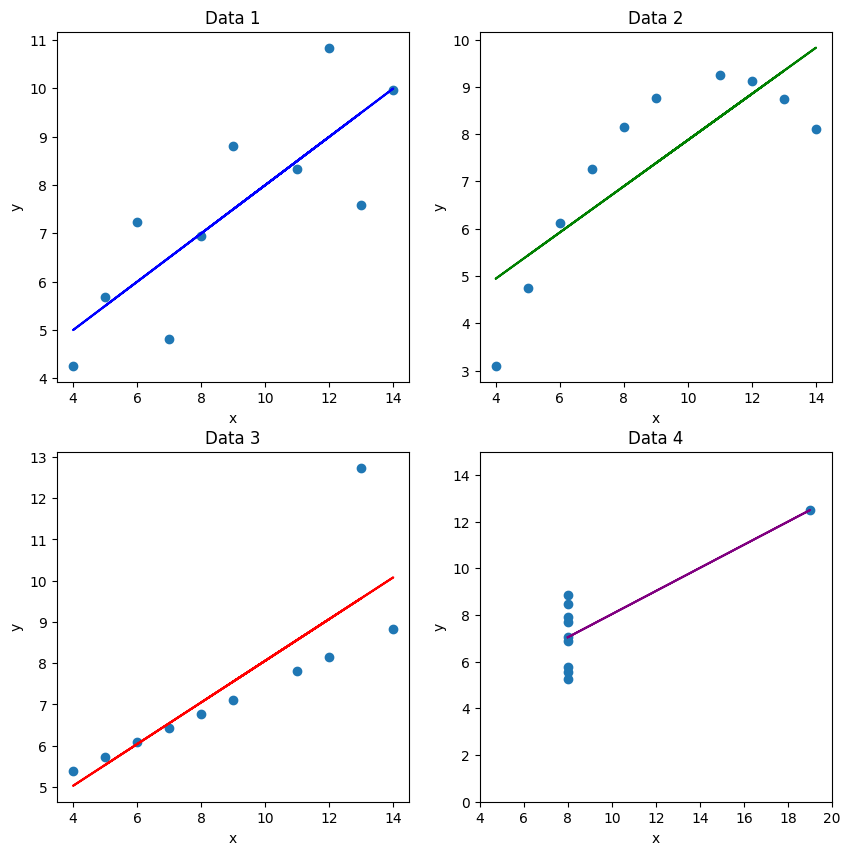

In [50]:
from scipy import stats

plotColors = ["blue","green","red","purple"]

# 2 by 2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Linear regression for each data
i = 0
for d in data:
    i += 1
    a, b, r_value, p_value, std_err = stats.linregress(d.iloc[:, 0], d.iloc[:, 1])
    row, col = divmod(i-1, 2)
    axs[row, col].scatter(d.iloc[:, 0], d.iloc[:, 1])
    axs[row, col].plot(d.iloc[:, 0], a * d.iloc[:, 0] + b, color=plotColors[i-1])
    axs[row, col].set_title("Data " + str(i))
    axs[row, col].set_xlabel("x")
    axs[row, col].set_ylabel("y")
    print("Linear regression for data", i, ": y =", a, "x +", b)
    print("R-squared:", r_value**2)
    print("p-value:", p_value)
    print("Standard error:", std_err)

#Use same x y limits for all subplots
plt.xlim(4, 20)
plt.ylim(0, 15)
plt.show()

Now that you get a better sense of why data visualization is an important and powerful tool, you are ready to get a small intro on the topic! Again, don't watch the video until **after** you've done exercise 1.1 

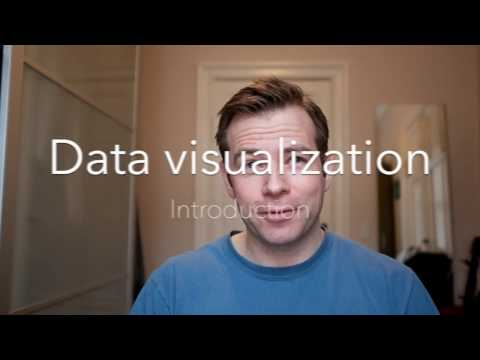

In [51]:
from IPython.display import YouTubeVideo
YouTubeVideo('9D2aI30AMhM', width=800, height=450)

> *Excercise:* Questions for the lecture. 
> 
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.
>

<div class="alert alert-block alert-info">
Answer in your own words based on the video, don't use your LLM. Once you've written down your answers, it's OK to use the LLM to get better. It's easy to write a lot with LLMs, but here I want you to keep your answers short and precise.
</div>


## Part 2: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify. 

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [52]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> **Note:** restrict yourself to the dataset of *entire years*.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?


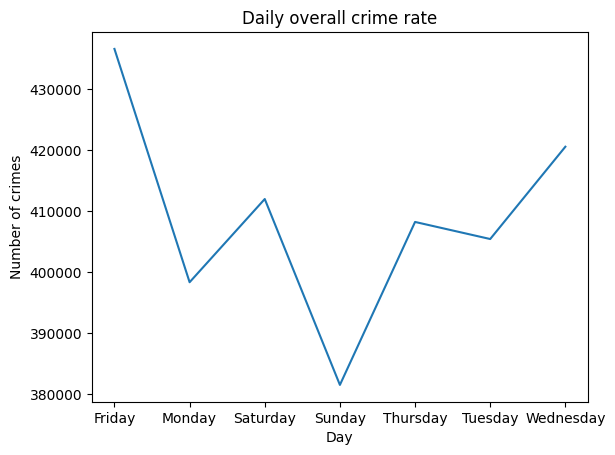

In [53]:
#Load previous complete data Police_Department_Incident_Reports_Complete.csv
data = pd.read_csv("../data/Police_Department_Incident_Reports_Complete.csv", sep=",")

#Daily crime rate based on "Day of Week"
dailyCrime = data.groupby("Day of Week").size()
dailyCrime.plot()
plt.xlabel("Day")
plt.ylabel("Number of crimes")
plt.title("Daily overall crime rate")
plt.show()

It's very clear that Sunday is "less crime day" - presumably since people are home.

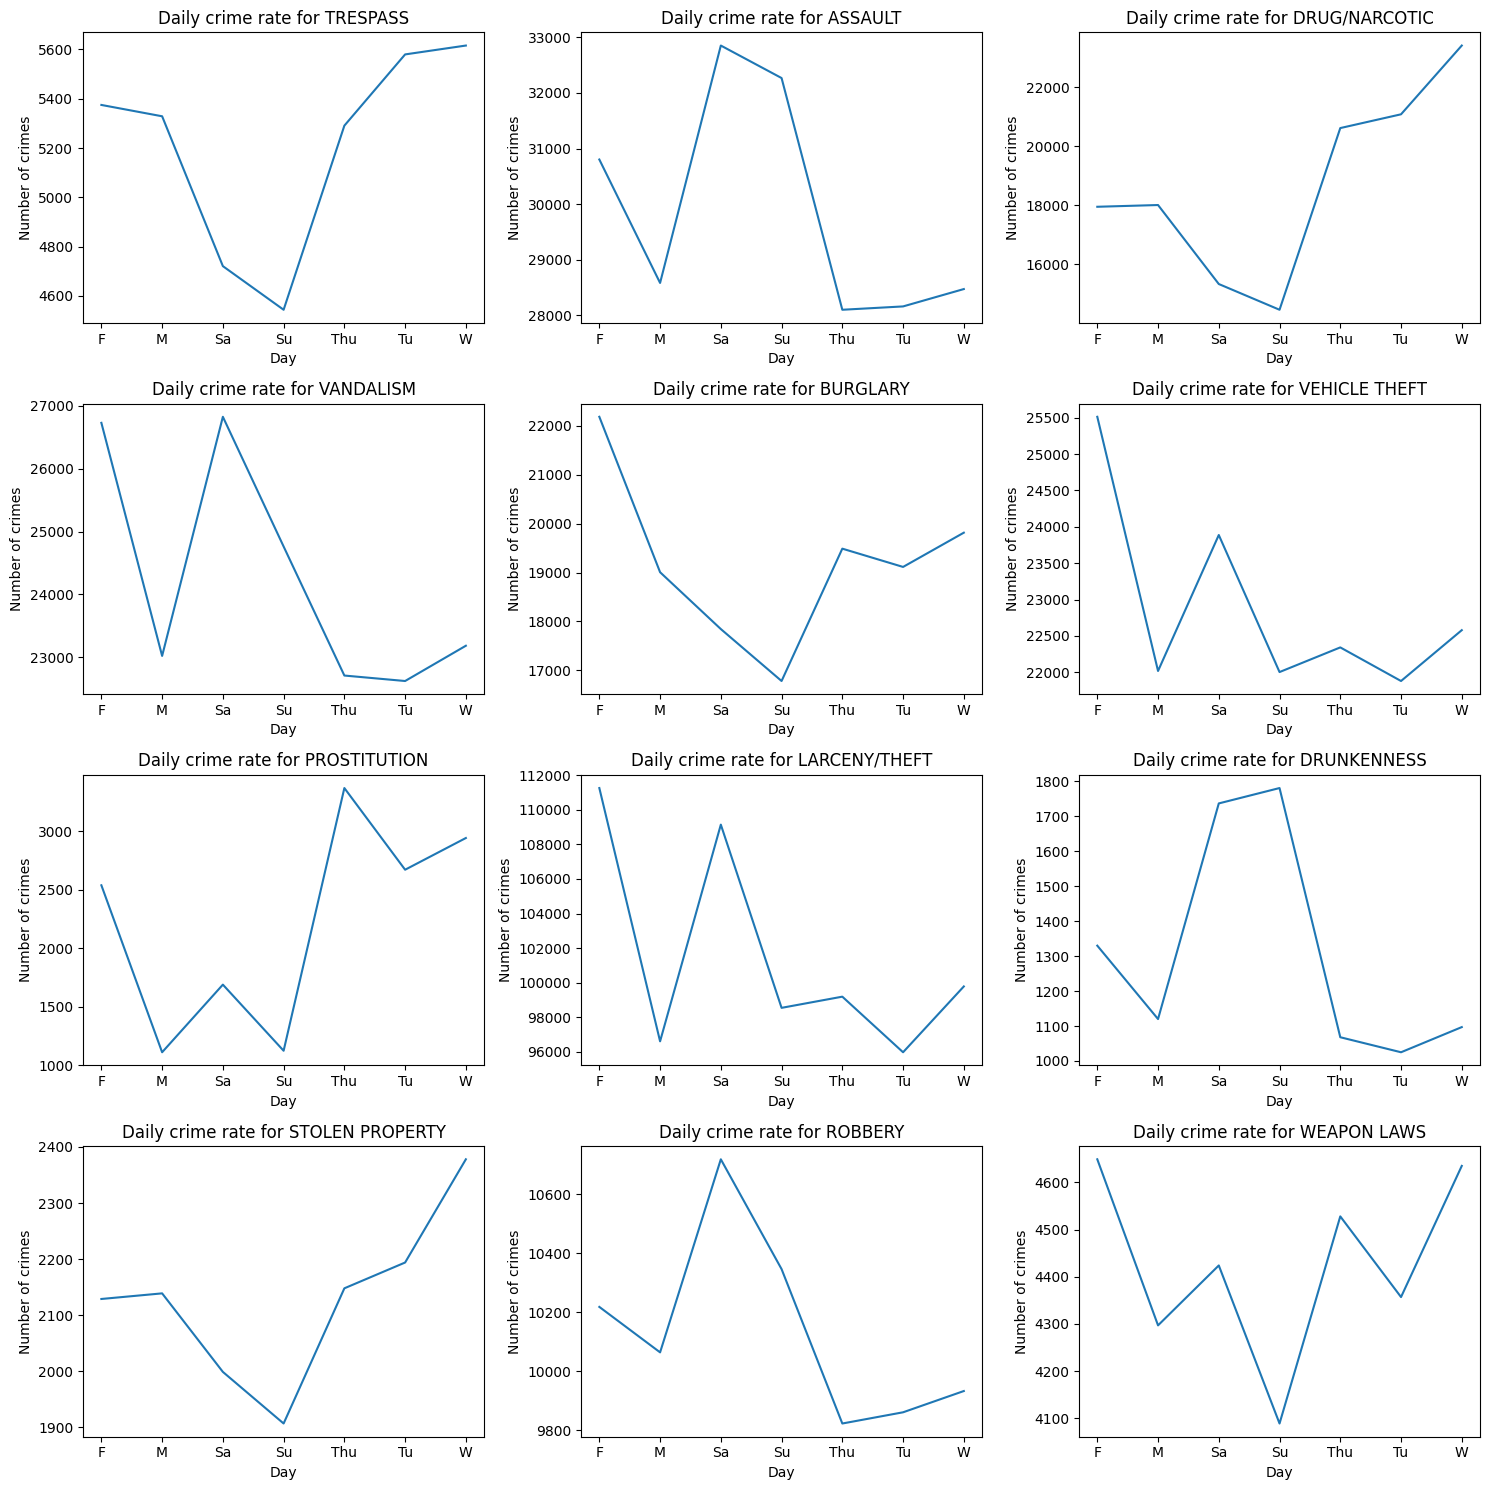

In [54]:
#Now for each focus crime (daily)
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

i = 0
for crime in focuscrimes:
    crimeData = data[data["Category"] == crime]
    dailyCrime = crimeData.groupby("Day of Week").size()
    row, col = divmod(i, 3)
    dailyCrime.plot(ax=axs[row, col])
    axs[row, col].set_title("Daily crime rate for " + crime)
    axs[row, col].set_xlabel("Day")
    axs[row, col].set_ylabel("Number of crimes")
    i += 1
    #Axs ticks to be M for monday etc
    axs[row, col].xaxis.set_ticks(np.arange(7), ['F', 'M', 'Sa', 'Su', 'Thu', 'Tu', 'W'])

plt.tight_layout()

Sunday: Fewer crimes. People are home.Except for drukenness and assault which is properly people out on a night on the town.

> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

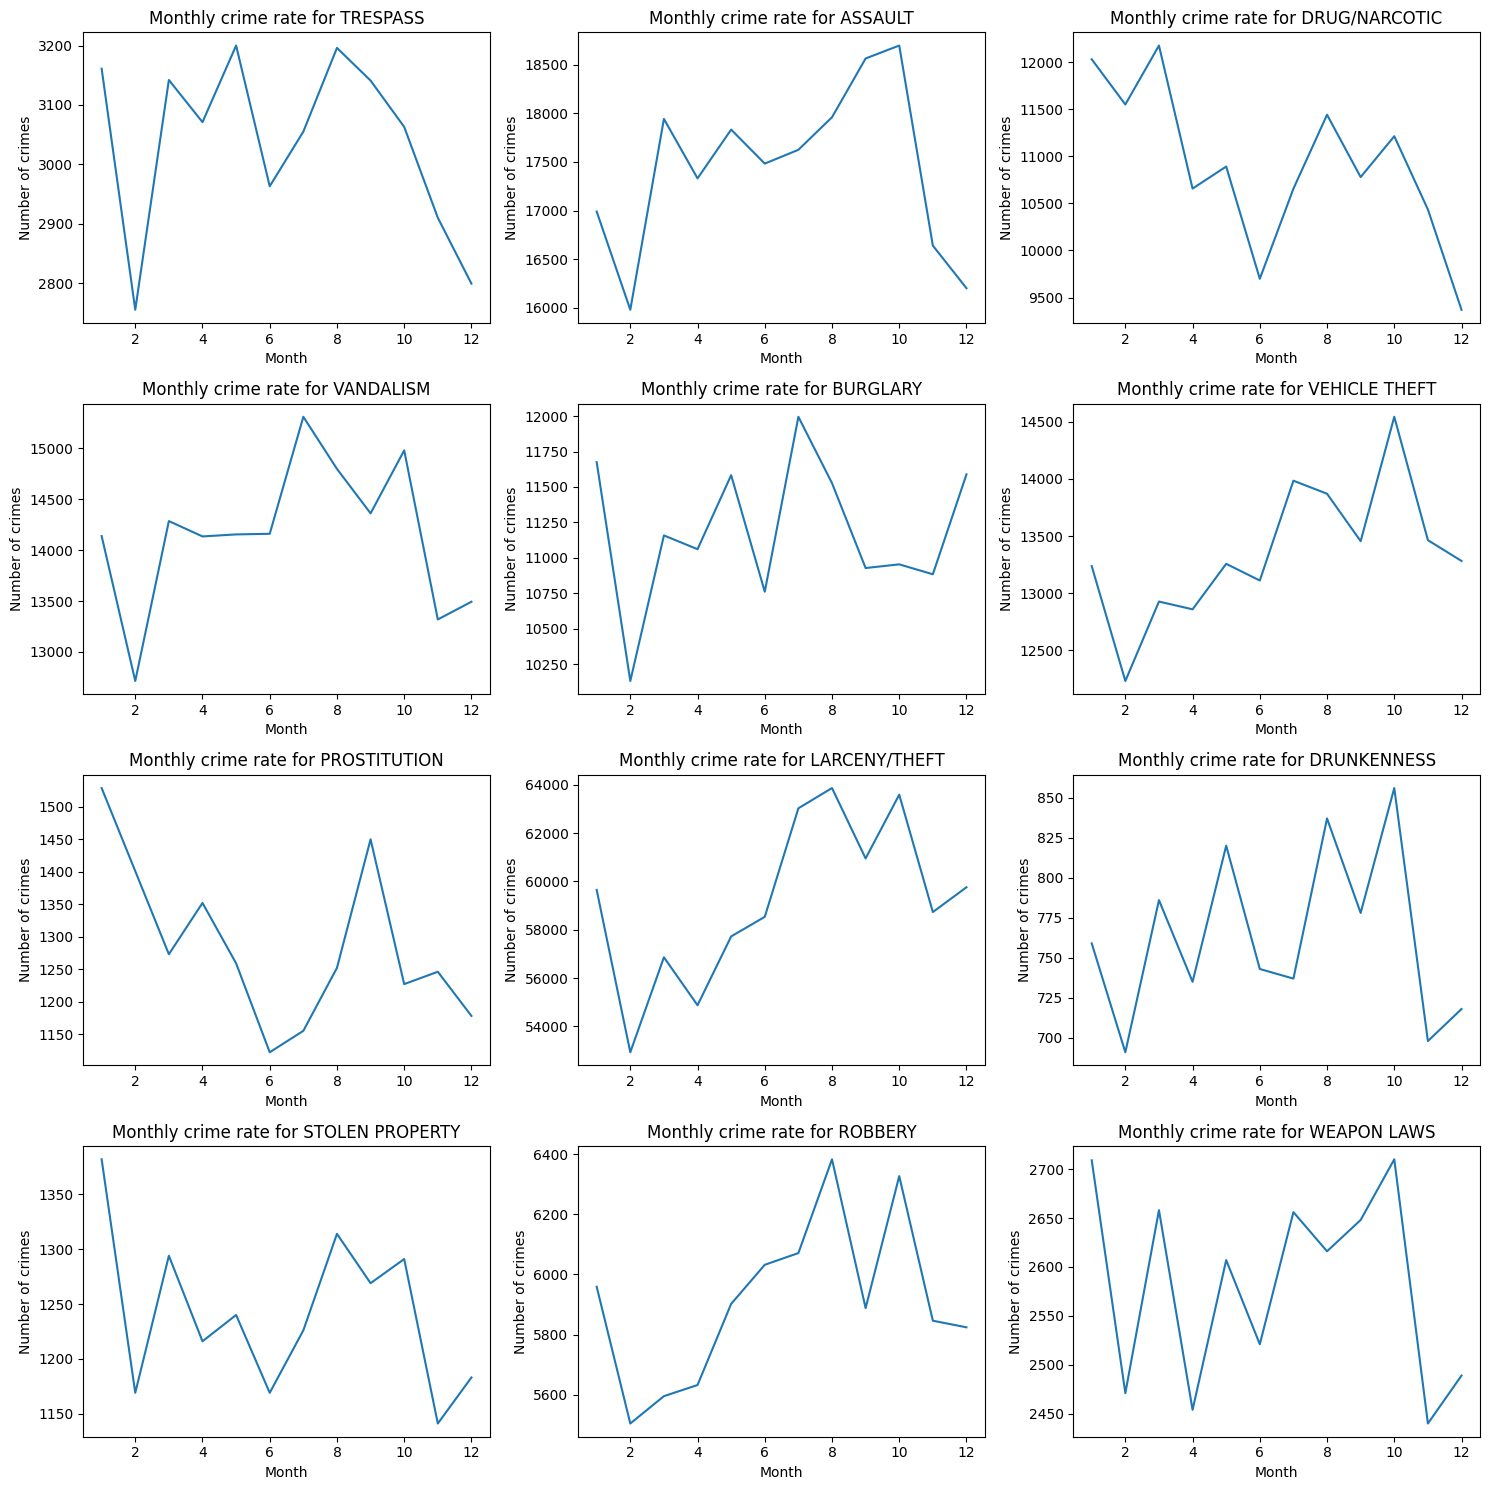

In [55]:
#Monthly crime rate based on "Month"
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

i = 0
for crime in focuscrimes:
    crimeData = data[data["Category"] == crime]
    dailyCrime = crimeData.groupby("Month").size()
    row, col = divmod(i, 3)
    dailyCrime.plot(ax=axs[row, col])
    axs[row, col].set_title("Monthly crime rate for " + crime)
    axs[row, col].set_xlabel("Month")
    axs[row, col].set_ylabel("Number of crimes")
    i += 1

plt.tight_layout()

Americans have school holidays from 25th dec - 6 january, which could be the reason there ar emany stolen property crimes in january. Also gifts from Christmas.

Why is crime so low in February generally? Is it the coldest month?

> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

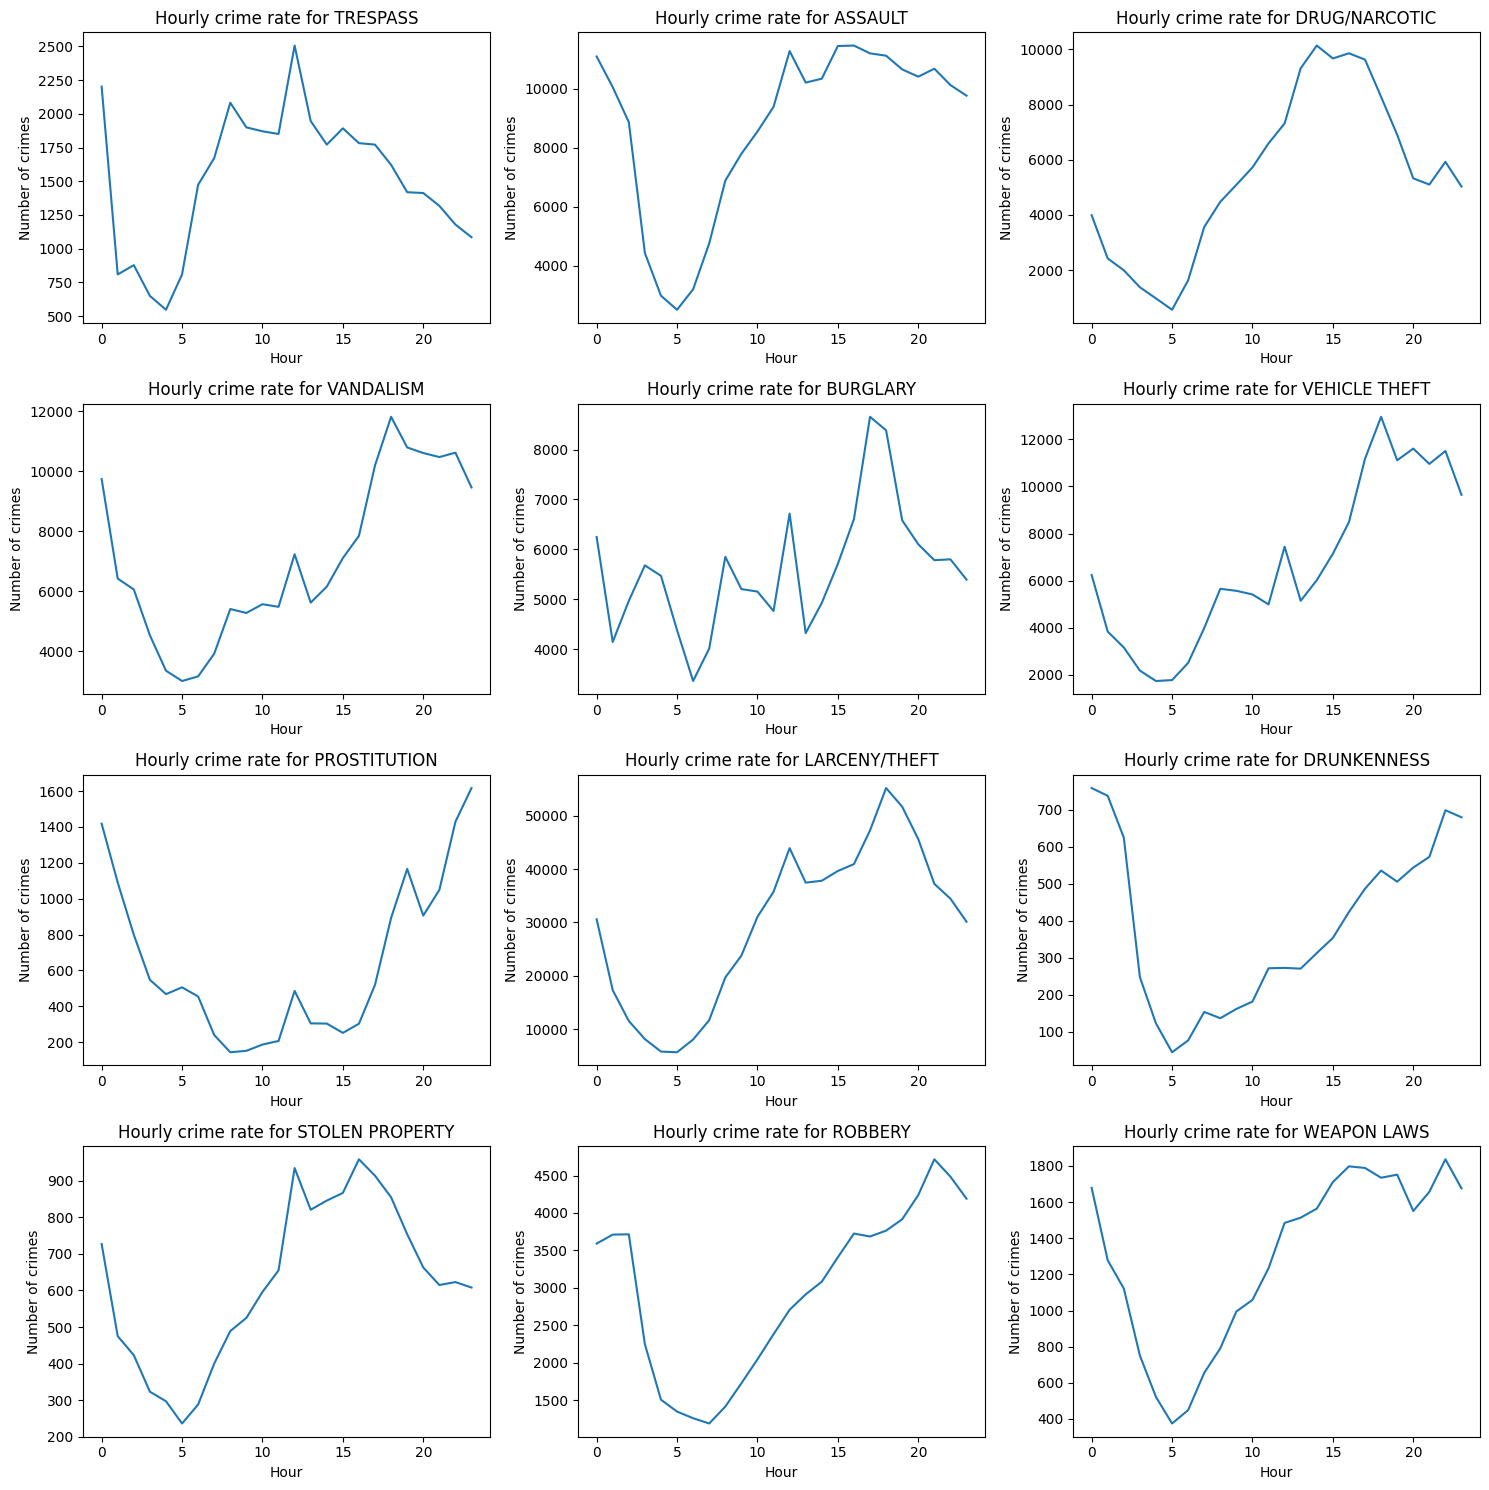

In [56]:
#Hourly crime rate based on "Hour"
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

i = 0
for crime in focuscrimes:
    crimeData = data[data["Category"] == crime]
    dailyCrime = crimeData.groupby("Hour").size()
    row, col = divmod(i, 3)
    dailyCrime.plot(ax=axs[row, col])
    axs[row, col].set_title("Hourly crime rate for " + crime)
    axs[row, col].set_xlabel("Hour")
    axs[row, col].set_ylabel("Number of crimes")
    i += 1

plt.tight_layout()

- Late hours: Prostetution, drunkeness, vandalism
- Few crimes around 5 am (Maybe it is not reported until later in the morning?)

> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

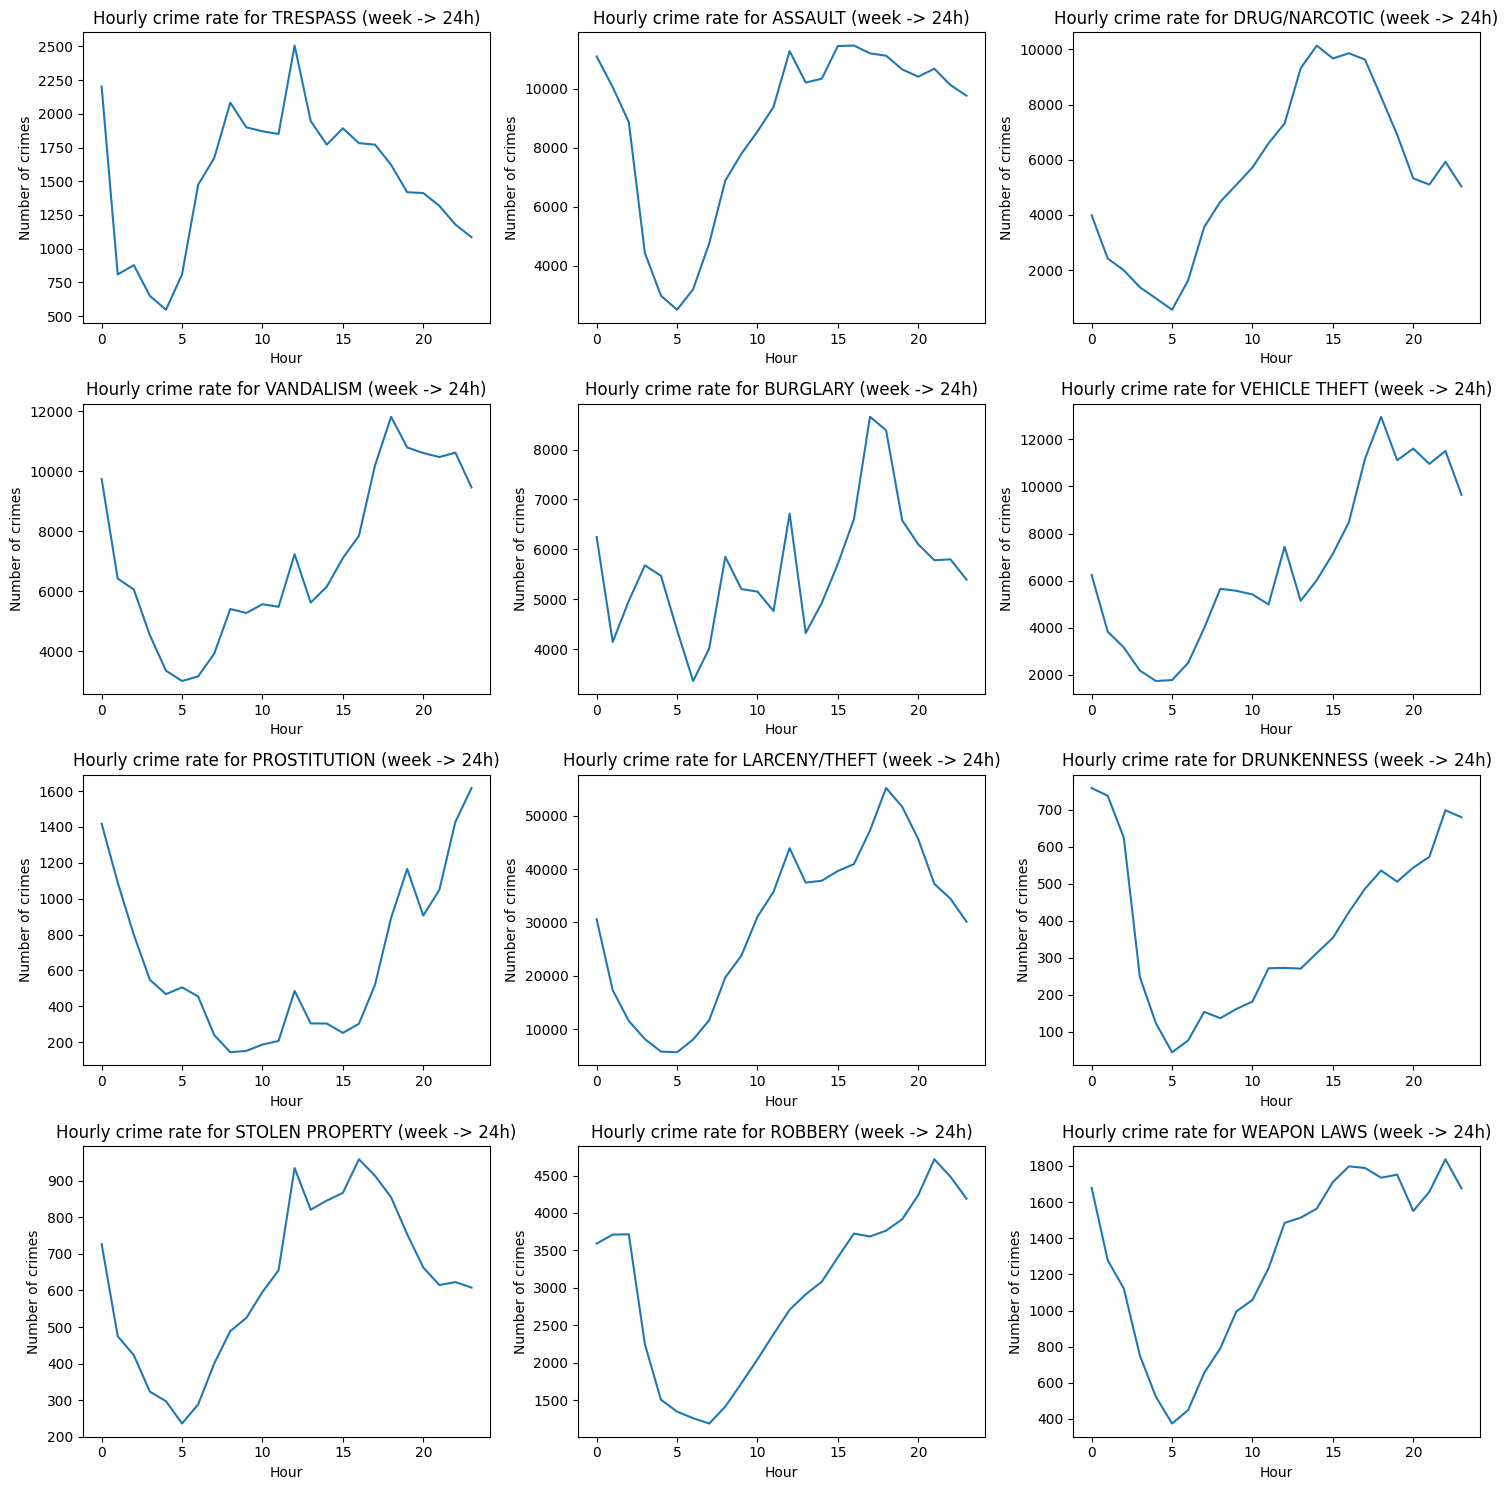

In [57]:
#Combined monday 0-24 hour, all focus crimes

#Plot individually
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
short_days = ['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su']

for crime in focuscrimes:
    combined_weekly_crime = np.zeros(24)
    for i in range(7):  # for each day
        crimeData = data[data["Category"] == crime]
        dailyCrime = crimeData[crimeData["Day of Week"] == days[i]].groupby("Hour").size()
        combined_weekly_crime += dailyCrime.reindex(np.arange(24), fill_value=0).values

    row, col = divmod(list(focuscrimes).index(crime), 3)
    axs[row, col].plot(np.arange(24), combined_weekly_crime)
    axs[row, col].set_title("Hourly crime rate for " + crime + " (week -> 24h)")
    axs[row, col].set_xlabel("Hour")
    axs[row, col].set_ylabel("Number of crimes")

plt.tight_layout()
plt.show()

**Fun little thing**: To further make the point of the exercise in Part 1, check out this video on youtube https://www.youtube.com/watch?v=DbJyPELmhJc  

# Part 3: Creating nice plots

Ok. There's a lot of barcharts today. We need them ... they are a fantastic tool for data exploration. But it can get monotonous, so let's take a little break to talk about something else before digging deeper with the barcharts.

I want to tell you a bit about how to make nice plots. I do that in the video below

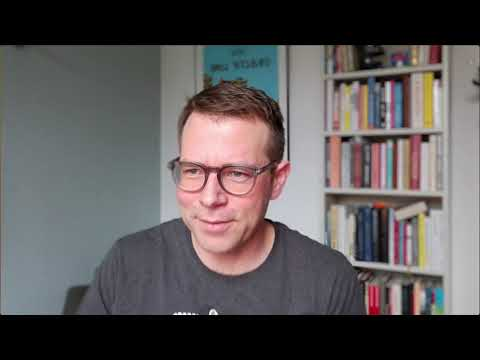

In [58]:
YouTubeVideo('9hIu4pgJXQc', width=800, height=450)

> *Exercise:* Nice plots. 
>
> * Create a list of 10 rules for nice plots based on the video.

<div class="alert alert-block alert-info">
Answer in your own words, do your own research, don't use your LLM. Once you've written down your answers, it's OK to use the LLM to get better.
</div>

# Part 4: Exploring other types of plots for temporal data

We continue our mini-break from barcharts by exploring more ways to plot temporal data.

> *Exercise:* Other cool ways to plot temporal data. I am going to introduce three different plot-types. Then your job is to choose a part of the crime-data that you care about - and plot it using these new ways of visualizing data. <font color="grey">For this one, you may use the full power of your LLM! Yes, I'm serious. Go nuts and see if you can get these plots going by fully relying on code generated by your LLM</font>. In case you want to use the *old ways* (that's of course always OK), I've included links and tips. 
>
>I recommend that you choose a different part of the crime-data for each plot-type.
> * Calendar plots. Get started on calendar plots **[here](https://calplot.readthedocs.io/en/latest/)**. There are other packages for plotting these, those are also OK to use.


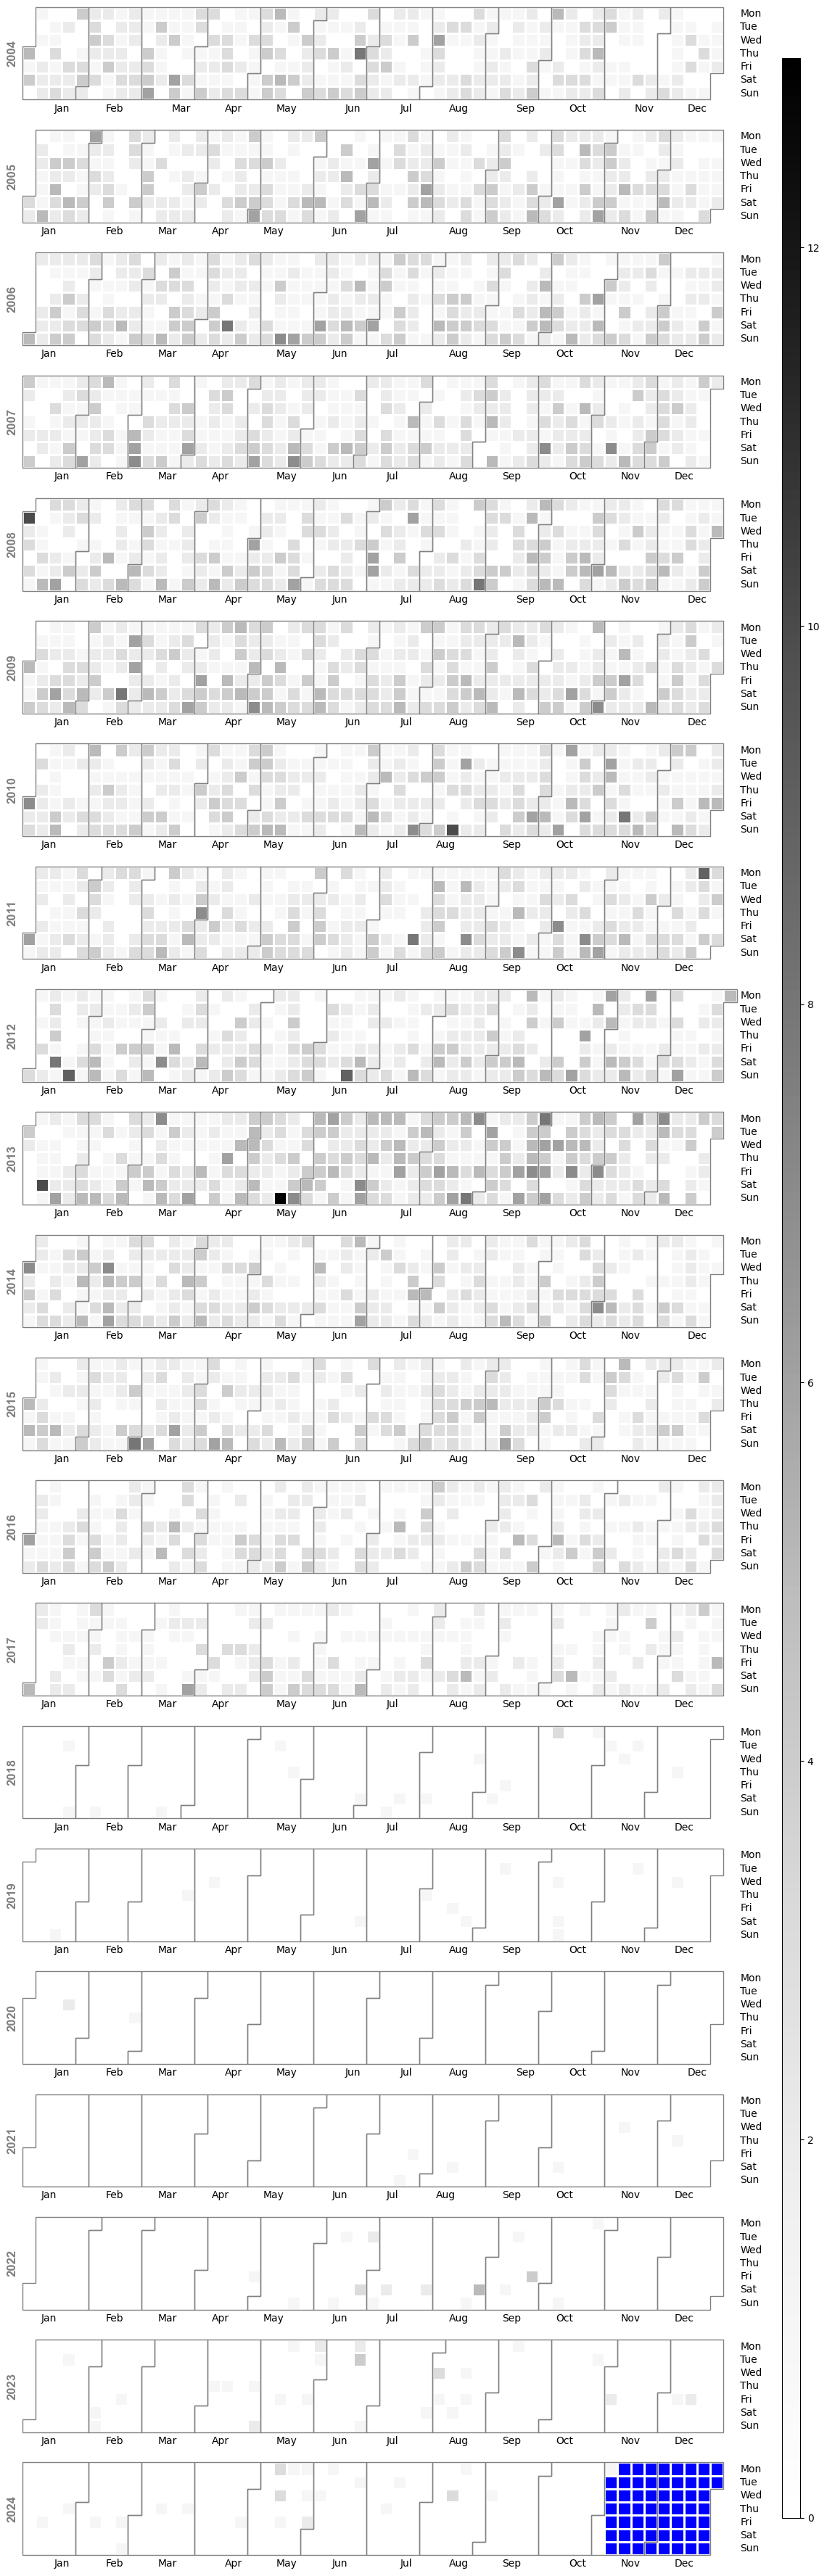

In [59]:
#Calandar plot
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd
import calplot

# Create a Date column by combining Year, Month, and Day
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
#Only for drunkenness
drunkData = data[data["Category"] == "DRUNKENNESS"]

crimes = drunkData['Date'].value_counts().sort_index() # Count the number of incidents per day


# green->yellow->red colormap colormap
cmap_orig = plt.colormaps['Greys']

# Plot the calendar heatmap
calplot.calplot(
    data=crimes, 
    cmap=cmap_orig, 
    fillcolor="Blue",
    colorbar=True,
    yearlabel_kws={
        'fontname':'Arial',
        'fontsize':12,
        'fontweight':'bold'
    }
)

plt.show()


Data after 2018 has not been correctly loaded

> * [Polar bar chart](https://user-images.githubusercontent.com/12328192/89272649-be76e200-d63e-11ea-97ad-fd1ba5831c89.png). Here I want you to plot a 24-hour pattern of some sort -- those work really well in radial plots (another name for polar plots) because the day  wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).


> * Time series. Time series is a key functionality of `Pandas`, so here I simply recommend starting by searching your favorite search engine for something like `time series` `pandas`
> * Reflection (<font color="grey">no LLM help here</font>): What did you learn from using LLM's to simply solve everything in this exercise (in contrast to the previous ones).

**Note**: I added this exercise with fewer hints than usual. Normally, I help you break down the problems into small solvable bits. <font color="grey">Since this is a LLM exercise, I haven't done that. But I encourage you to play with figuring out the steps in solving the problem. You can ask the LLM to help you if you like (but perhaps try yourself first and compare to what the LLM suggested).</font> 

This ties in to a bigger picture thing about data science.

*My philosophy for data science is this*: Getting to what you want rarely seems hard once you found your way there, the difficulty comes in breaking down a hard problem into the little steps you need to take to solve your complex problem. In this class, I usually do the breaking down for you and provide you with the steps (that's how you go from nothing to creating complex visualizations of crime-data). But I also want you to learn the breaking-problems-down part. <font color="grey">This is one of the areas where LLMs can be of help -- they excel at breaking down problems into smaller bits -- but if you don't try yourself, you'll never get good at it. So always create your own breakdown first, then see what the computer thinks. Perhaps it can help you get better at it 😀 </font>.

In [60]:
#Times series plot using Pandas
import pandas as pd



# Part 5: Back to visualizing patterns in the data

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco. <font color="grey">See if you can do this on your own - the calculations are fairly simple. If you get stuck, you may ask your LLM for advice, but don't use it to simply generate the plots. Use it as a help to get hints at how to solve the things you can't figure out on your own.</font>

> *Exercise*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?


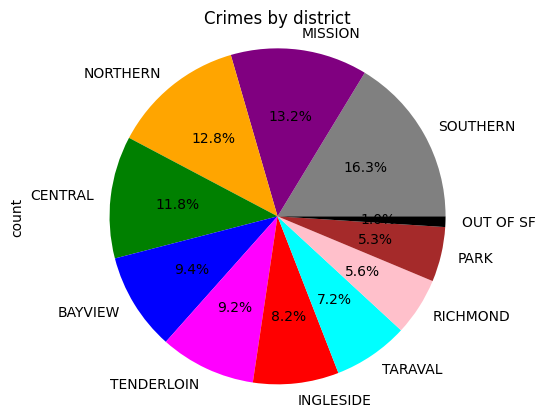

In [61]:
# Show crimes by district as pie chart (%)

# Give each district a color
district_colors = {
    'BAYVIEW': 'blue',
    'CENTRAL': 'green',
    'INGLESIDE': 'red',
    'MISSION': 'purple',
    'NORTHERN': 'orange',
    'PARK': 'brown',
    'RICHMOND': 'pink',
    'SOUTHERN': 'gray',
    'TARAVAL': 'cyan',
    'TENDERLOIN': 'magenta'
}

districts = data['Police District'].value_counts()
districts.plot.pie(autopct='%1.1f%%', colors=[district_colors.get(district, 'black') for district in districts.index])
plt.axis('equal')
plt.title('Crimes by district')
plt.show()


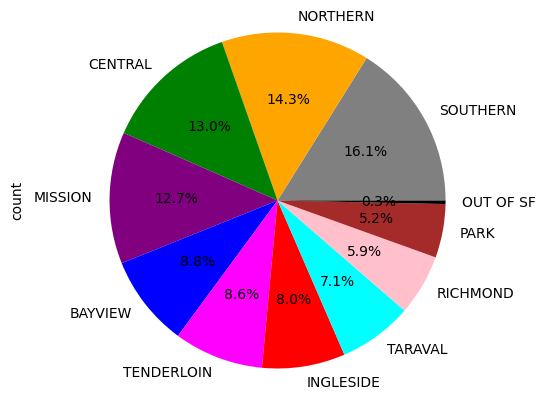

In [62]:
#Show focus crimes by district as pie chart (%)

focus_crimes = data[data['Category'].isin(focuscrimes)]
districts = focus_crimes['Police District'].value_counts()
districts.plot.pie(autopct='%1.1f%%', colors=[district_colors.get(district, 'black') for district in districts.index])
plt.axis('equal')
plt.show()

Mission has notably more focus crimes than regular crimes. 

>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.


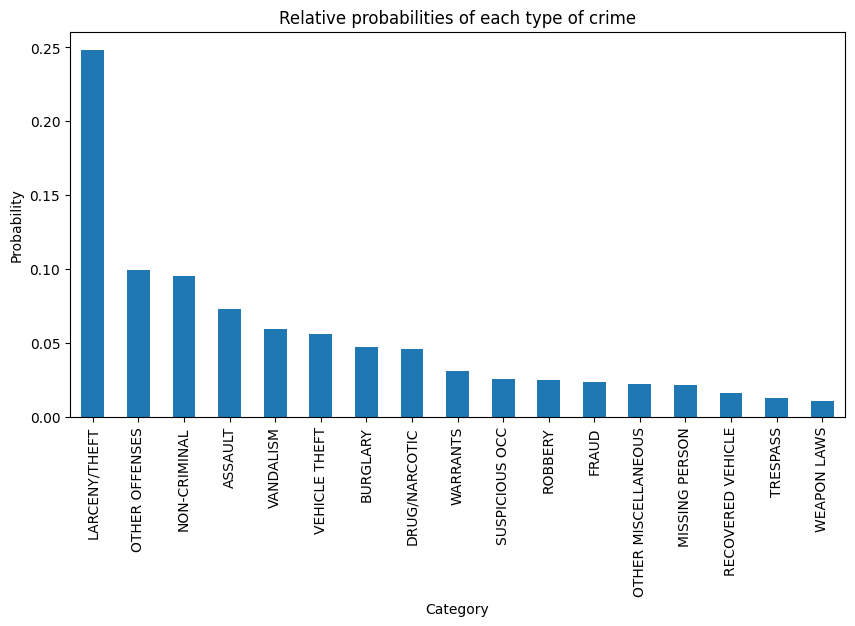

In [66]:
#Relative probabilities of each type of crime
crime_probabilities = data['Category'].value_counts(normalize=True)
#Don't include less than 0.01
crime_probabilities = crime_probabilities[crime_probabilities > 0.01]
crime_probabilities.plot.bar()
plt.ylabel('Probability')
plt.title('Relative probabilities of each type of crime')
#More width for better visualization
plt.gcf().set_size_inches(10, 5)
plt.show()

>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.


IndexError: index 5 is out of bounds for axis 0 with size 5

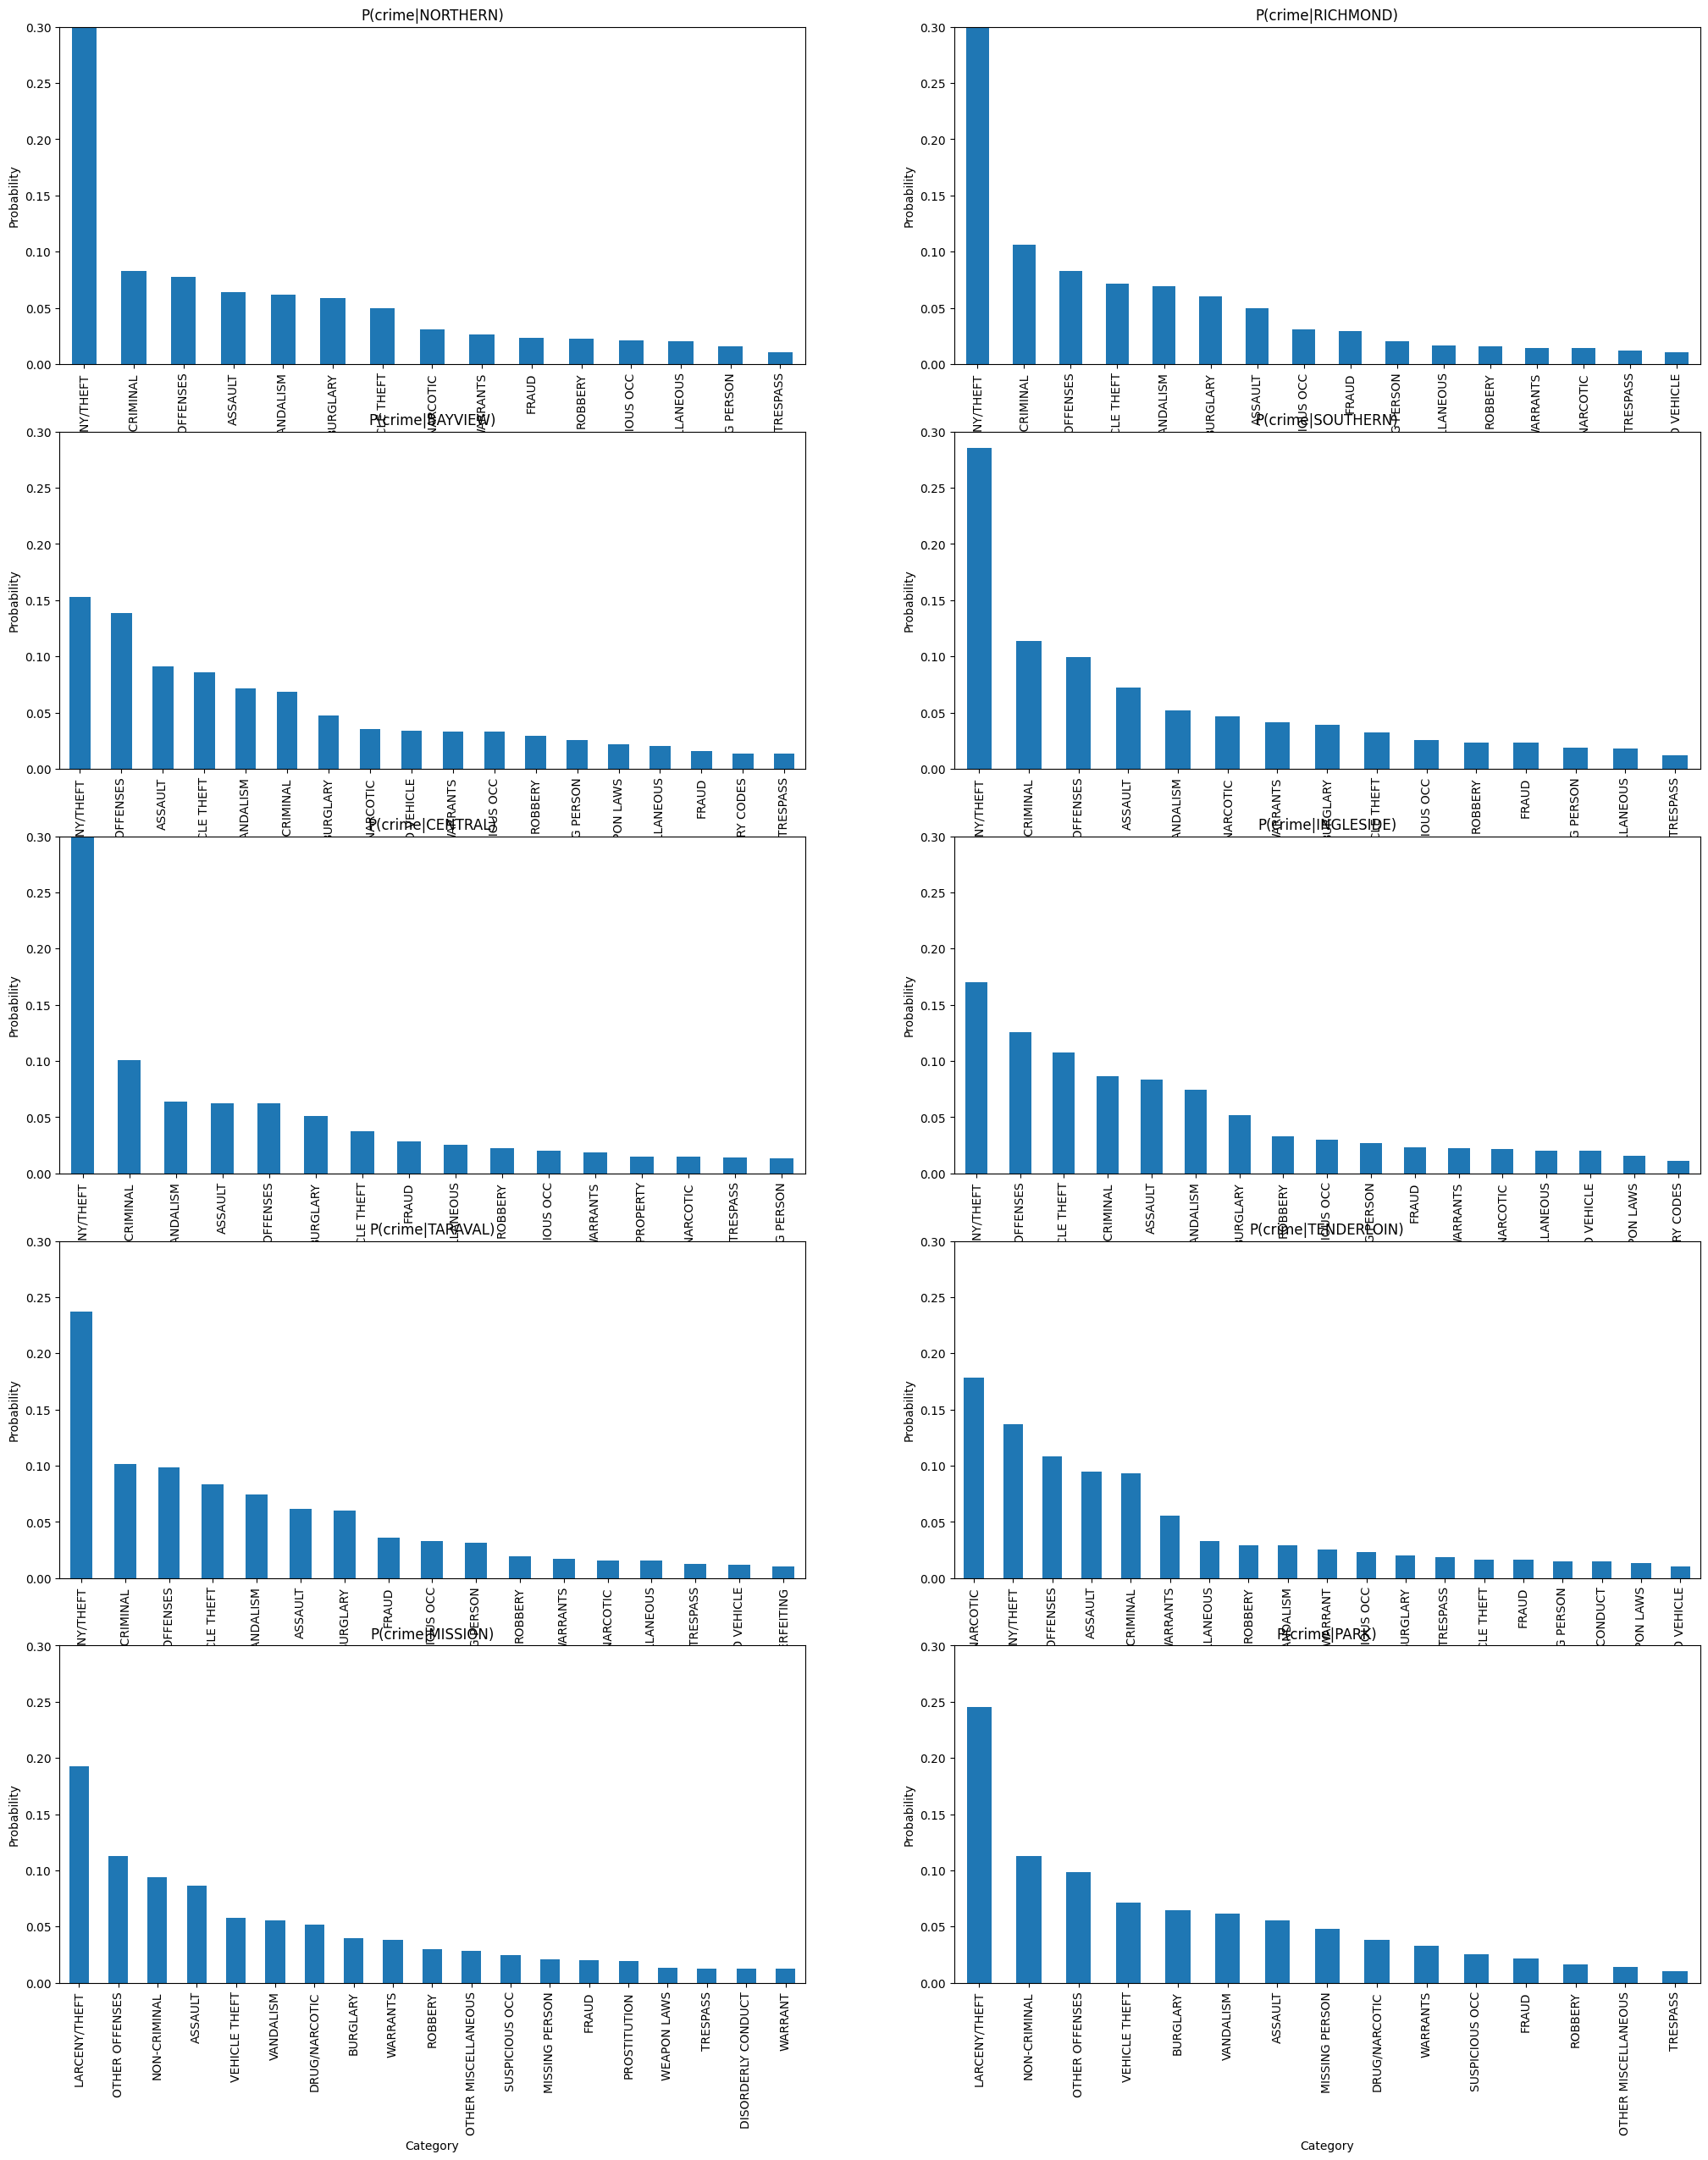

In [76]:
#P(crime|district) probability distribution per district
crime_probabilities = data['Category'].value_counts(normalize=True)
#Per district
districts = data['Police District'].unique()
fig, axs = plt.subplots(5, 2, figsize=(25, 30)) 
for i, district in enumerate(districts):
    crime_probabilities_district = data[data['Police District'] == district]['Category'].value_counts(normalize=True)
    crime_probabilities_district = crime_probabilities_district[crime_probabilities_district > 0.01]
    row, col = divmod(i, 2)
    if not crime_probabilities_district.empty:
        crime_probabilities_district.plot.bar(ax=axs[row, col])
    axs[row, col].set_ylabel('Probability')
    axs[row, col].set_title('P(crime|' + district + ')')
    axs[row, col].set_ylim(0, 0.3)

plt.tight_layout(pad=3.0,w_pad=1.0,h_pad=1.0)

>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.


>    - For each district plot these ratios for the 14 focus crimes. My plot (based on 2003-2018 data) looks like this
> ![Histograms](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/conditional.png "histograms")
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia <font color="grey">(or from your LLM's description of those neighborhoods)</font>?
>    - What neighborhood would you prefer to live in? Explain why?
>    - <font color="grey">BONUS QUESTION. Can you get your LLM to discuss the graphic you created? (E.g. by showing it the image) Did it notice anything you didn't?</font>